In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 1
%pwd

'/ocean/projects/asc170022p/mtragoza/MRE-PINN/notebooks'

In [2]:
import sys, os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

os.environ['DDEBACKEND'] = 'pytorch'
sys.path.append('..')
%aimport mre_pinn

Loading /ocean/projects/asc170022p/mtragoza/MRE-PINN/notebooks/../mre_pinn/__init__.py
/ocean/projects/asc170022p/mtragoza/.conda/envs/MRE-PINN2/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using backend: pytorch



## BIOQIC FEM box simulation data

In [3]:
# load the MATLAB file
data_root = '../data/BIOQIC'
mat_base = 'four_target_phantom.mat'

mat_file = data_root + '/' + mat_base
data, rev_axes = mre_pinn.data.load_mat_data(mat_file, verbose=True)

Loading ../data/BIOQIC/four_target_phantom.mat
    __header__: <class 'bytes'>
    __version__: <class 'str'>
    __globals__: <class 'list'>
    u_ft: <class 'numpy.ndarray'> (100, 80, 10, 3, 6) complex128


In [4]:
# convert to xarray
u = data['u_ft'].T
u_dims = ['frequency', 'component', 'z', 'x', 'y']
u_coords = {
    'frequency': 50 + np.arange(u.shape[0]) * 10,
    'component': ['y', 'x', 'z'],
    'z': np.arange(u.shape[2]) * 1, # mm
    'x': np.arange(u.shape[3]) * 1, # mm
    'y': np.arange(u.shape[4]) * 1  # mm
}
u = xr.DataArray(u, dims=u_dims, coords=u_coords)
u

<xarray.DataArray (frequency: 6, component: 3, z: 10, x: 80, y: 100)>
array([[[[[ 1.80392877e-03-2.21015603e-03j,
            1.89734370e-03-2.18494845e-03j,
            1.95992162e-03-2.15976800e-03j, ...,
           -1.49606247e-03+8.40557373e-04j,
           -1.50236176e-03+8.61343421e-04j,
           -1.50187882e-03+8.89141659e-04j],
          [ 1.78532489e-03-2.20576001e-03j,
            1.87508117e-03-2.18151355e-03j,
            1.93444137e-03-2.15399541e-03j, ...,
           -1.48350920e-03+8.44098535e-04j,
           -1.48997042e-03+8.64426386e-04j,
           -1.49067446e-03+8.92325628e-04j],
          [ 1.72418489e-03-2.18949728e-03j,
            1.80956327e-03-2.16559650e-03j,
            1.86579081e-03-2.13955926e-03j, ...,
           -1.44634104e-03+8.54366252e-04j,
           -1.45118038e-03+8.73894777e-04j,
           -1.45485437e-03+9.00096497e-04j],
          ...,
          [ 8.21737731e-04-6.94664044e-04j,
...
           -5.44501537e-05+2.54427504e-04j],
          ...,
          [ 0.00000000e+00+0.00000000e+00j,
           -1.34377842e-03+1.14855126e-03j,
           -2.60435347e-03+2.19105626e-03j, ...,
           -3.75203041e-03+2.92838564e-03j,
           -2.70241022e-03+2.03222141e-03j,
           -1.34643228e-03+1.08914689e-03j],
          [ 1.81275393e-15-1.15294473e-15j,
           -1.69027358e-03+9.07056920e-04j,
           -3.35900798e-03+1.59765597e-03j, ...,
           -4.87660410e-03+1.87476944e-03j,
           -3.42688885e-03+1.46604018e-03j,
           -1.71646461e-03+8.41852393e-04j],
          [-5.26746902e-09+2.28514411e-09j,
           -1.93594437e-03+7.00407601e-04j,
           -3.87632894e-03+1.07117799e-03j, ...,
           -5.71266057e-03+6.26571235e-04j,
           -3.92855890e-03+9.43751613e-04j,
           -1.93945465e-03+6.69014975e-04j]]]]])
Coordinates:
  * frequency  (frequency) int64 50 60 70 80 90 100
  * component  (component) <U1 'y' 'x' 'z'
  * z          (z) int64 0 1 2 3 4 5 6 7 8 9
  * x          (x) int64 0 1 2 3 4 5 6 7 8 9 ... 70 71 72 73 74 75 76 77 78 79
  * y          (y) int64 0 1 2 3 4 5 6 7 8 9 ... 90 91 92 93 94 95 96 97 98 99

(6, 3, 10, 80, 100)


<IPython.core.display.Javascript object>


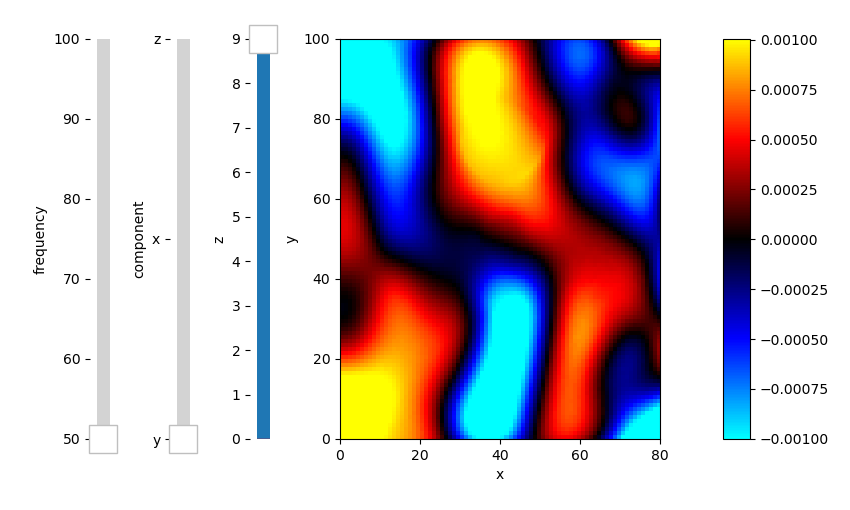

In [10]:
%autoreload
w_map = mre_pinn.visual.wave_color_map()
w_max = 0.02
wave_kws = dict(cmap=w_map, vmin=-w_max, vmax=w_max)

print(u.shape)
mre_pinn.visual.NDArrayViewer(u.real, **wave_kws)